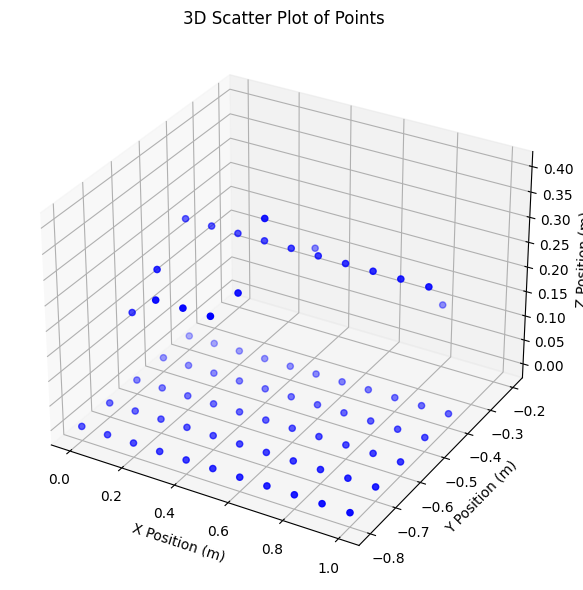

In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def main():
    data_folder = "data"
    log_files = [f for f in os.listdir(data_folder) if f.endswith(".log")]

    # Initialize lists to store positions
    x_positions = []
    y_positions = []
    z_positions = []

    for log_file in log_files:
        # Split the filename using underscores
        parts = os.path.splitext(log_file)[0].split('_')
        if len(parts) == 3:
            x, y, z = map(int, parts)
            x_positions.append(x)
            y_positions.append(y)
            z_positions.append(z)

    # Convert positions from cm to meters
    x_positions = np.array(x_positions) / 100.0
    y_positions = np.array(y_positions) / 100.0
    z_positions = np.array(z_positions) / 100.0

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(8, 6))  # Adjust the figsize parameter for larger graphs
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_positions, y_positions, z_positions, c='b', marker='o')

    ax.set_xlabel('X Position (m)')
    ax.set_ylabel('Y Position (m)')
    ax.set_zlabel('Z Position (m)')
    ax.set_title('3D Scatter Plot of Points')

    plt.tight_layout() 
    plt.show()

if __name__ == "__main__":
    main()


MovieWriter imagemagick unavailable; using Pillow instead.


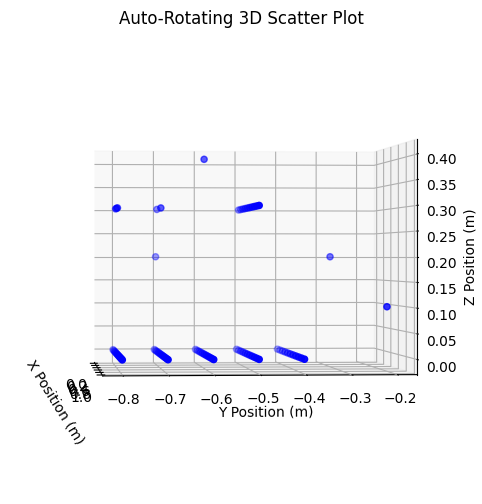

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import os

def update(num, scatter, ax):
    ax.view_init(elev=0, azim=num)  # Keep elevation fixed at 0 degrees

def main():
    data_folder = "data"
    log_files = [f for f in os.listdir(data_folder) if f.endswith(".log")]

    # Initialize lists to store positions
    x_positions = []
    y_positions = []
    z_positions = []

    for log_file in log_files:
        # Split the filename using underscores
        parts = os.path.splitext(log_file)[0].split('_')
        if len(parts) == 3:
            x, y, z = map(int, parts)
            x_positions.append(x)
            y_positions.append(y)
            z_positions.append(z)

    # Convert positions from cm to meters
    x_positions = np.array(x_positions) / 100.0
    y_positions = np.array(y_positions) / 100.0
    z_positions = np.array(z_positions) / 100.0

    # Create a 3D scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x_positions, y_positions, z_positions, c='b', marker='o')

    ax.set_xlabel('X Position (m)')
    ax.set_ylabel('Y Position (m)')
    ax.set_zlabel('Z Position (m)')
    ax.set_title('Auto-Rotating 3D Scatter Plot')

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 5), fargs=(scatter, ax))

    # Save the animation as a GIF file
    ani.save('auto_rotating_3d_scatter.gif', writer='imagemagick', fps=24)

    plt.show()

if __name__ == "__main__":
    main()


POS,1.20,-0.53,0POS,1.17,-0.51,0.28,95

POS,0.3POS,0.31,-0.30,0.06,54

POS,0.POS,0.65,-0.57,-0.04,85

Results saved to results.csv.


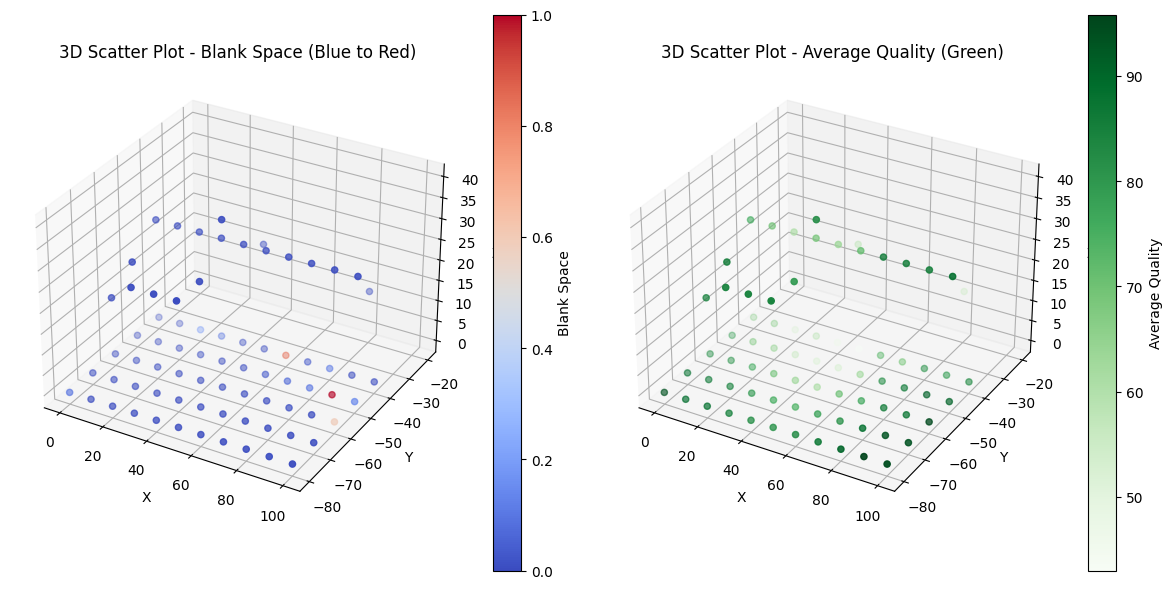

In [31]:
import os
import csv

data_folder = "data"
output_csv = "results.csv"

# Initialize the CSV header
csv_header = ["filename", "x", "y", "z", "nb_of_blank_space", "average_quality"]
data_rows = []

# Iterate through log files in the data folder
for log_file in os.listdir(data_folder):
    if log_file.endswith(".log"):
        file_path = os.path.join(data_folder, log_file)
        
        # Extract x, y, z from the filename
        x, y, z = map(float, os.path.splitext(log_file)[0].split('_'))
        
        # Initialize variables for counting blank spaces and calculating average quality
        blank_space_count = 0
        total_quality = 0
        quality_count = 0
        
        # Read and process data from the log file
        with open(file_path, 'r') as f:
            for line in f:
                if line.startswith("POS"):
                    try:
                        parts = line.strip().split(',')
                        if len(parts) >= 5:
                            quality = int(parts[4])
                            total_quality += quality
                            quality_count += 1
                    except:
                        print(line)
                else:
                    blank_space_count += 1
        
        # Calculate average quality
        average_quality = total_quality / quality_count if quality_count > 0 else 0
        
        # Append data to the rows list
        data_rows.append([log_file, x, y, z, blank_space_count, average_quality])

# Write data to the CSV file
with open(output_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(csv_header)
    writer.writerows(data_rows)

print(f"Results saved to {output_csv}.")

# Initialize empty lists to store data
x_values = []
y_values = []
z_values = []
blank_space_values = []
average_quality_values = []

# Read data from the CSV file
with open(output_csv, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        x_values.append(float(row['x']))
        y_values.append(float(row['y']))
        z_values.append(float(row['z']))
        blank_space_values.append(int(row['nb_of_blank_space']))
        average_quality_values.append(float(row['average_quality']))

# Normalize blank space values for color mapping
blank_space_min = min(blank_space_values)
blank_space_max = max(blank_space_values)
normalized_blank_space = np.interp(blank_space_values, (blank_space_min, blank_space_max), (0, 1))

# Create a single figure for both 3D scatter plots
fig = plt.figure(figsize=(12, 6))  # Adjust the figsize parameter for larger graphs

# Create the first 3D scatter plot for blank space (blue to red color map)
ax_blank = fig.add_subplot(121, projection='3d')
scatter_blank = ax_blank.scatter(x_values, y_values, z_values, c=normalized_blank_space, cmap='coolwarm', marker='o')
ax_blank.set_title("3D Scatter Plot - Blank Space (Blue to Red)")
ax_blank.set_xlabel('X')
ax_blank.set_ylabel('Y')
ax_blank.set_zlabel('Z')
fig.colorbar(scatter_blank, ax=ax_blank, label="Blank Space")

# Create the second 3D scatter plot for average quality (green)
ax_quality = fig.add_subplot(122, projection='3d')
scatter_quality = ax_quality.scatter(x_values, y_values, z_values, c=average_quality_values, cmap='Greens', marker='o')
ax_quality.set_title("3D Scatter Plot - Average Quality (Green)")
ax_quality.set_xlabel('X')
ax_quality.set_ylabel('Y')
ax_quality.set_zlabel('Z')
fig.colorbar(scatter_quality, ax=ax_quality, label="Average Quality")

plt.tight_layout()
plt.show()


## 1. Filtering incomplete Log Data

This code is designed to handle log files within a designated folder, addressing the issue of missing or incomplete information due to signal loss during data reception. The script filters out lines that do not conform to the correct syntax (POS,x,y,z,quality_factor), which ensures the integrity of the data.

In [4]:
import os

data_folder = "data"
filtered_folder = "data_filtered"

# Create the filtered folder if it doesn't exist
if not os.path.exists(filtered_folder):
    os.makedirs(filtered_folder)

# Iterate through log files in the data folder
for log_file in os.listdir(data_folder):
    if log_file.endswith(".log"):
        input_file_path = os.path.join(data_folder, log_file)
        output_file_path = os.path.join(filtered_folder, log_file)
        
        # Read the content of the input log file
        with open(input_file_path, 'r') as input_file:
            lines = input_file.readlines()
        
        # Filter out lines that don't match the specified syntax
        valid_lines = [line.strip() for line in lines if line.startswith("POS") and len(line.split(',')) == 5]
        
        # Save the valid lines to the output log file in the filtered folder
        with open(output_file_path, 'w') as output_file:
            output_file.write('\n'.join(valid_lines))
        
        print(f"Filtered log saved to {output_file_path}")


Filtered log saved to data_filtered\0_-40_0.log
Filtered log saved to data_filtered\0_-50_0.log
Filtered log saved to data_filtered\0_-60_0.log
Filtered log saved to data_filtered\0_-70_0.log
Filtered log saved to data_filtered\0_-80_0.log
Filtered log saved to data_filtered\100_-40_0.log
Filtered log saved to data_filtered\100_-50_0.log
Filtered log saved to data_filtered\100_-50_30.log
Filtered log saved to data_filtered\100_-60_0.log
Filtered log saved to data_filtered\100_-70_0.log
Filtered log saved to data_filtered\100_-80_0.log
Filtered log saved to data_filtered\10_-40_0.log
Filtered log saved to data_filtered\10_-50_0.log
Filtered log saved to data_filtered\10_-50_30.log
Filtered log saved to data_filtered\10_-60_0.log
Filtered log saved to data_filtered\10_-70_0.log
Filtered log saved to data_filtered\10_-70_20.log
Filtered log saved to data_filtered\10_-80_0.log
Filtered log saved to data_filtered\20_-40_0.log
Filtered log saved to data_filtered\20_-50_0.log
Filtered log sav

The script successfully filtered the log files in the "data" folder. It excluded lines with incomplete data or missing information, ensuring that only lines following the format "POS,x,y,z,quality_factor" were retained. Filtered log files were saved in the "data_filtered" folder, maintaining data integrity. Console messages confirmed the filtering and saving process.

This process effectively managed missing signal-induced data issues, resulting in a set of clean log files suitable for analysis or further processing.

## 2. Identifying Optimal Sample Size for Model Training

This part is developed to address a critical concern in machine learning: the relationship between sample size, training time, and model performance. The script's primary objective is to determine the number of samples required for efficient model training while achieving a satisfactory level of accuracy.

### Purpose

The purpose of this script is twofold:

1. **Evaluate Training Time vs. Sample Size**: By systematically varying the sample size used for model training, the script investigates how the number of samples impacts the time required to train the model. This exploration aims to find an optimal balance between training time and model accuracy.

2. **Guide Sample Size Selection**: The script's execution results in a collection of trained models for varying sample sizes. Analyzing the training times and model accuracies associated with different sample sizes can guide the selection of an appropriate sample size for future model training tasks.

### Workflow

1. **Iterative Exploration**: The script iterates through a range of sample sizes, training a linear regression model for each size.

2. **Data Preparation**: Log files in the specified "data_filtered" folder are processed. The script reads the last "n" lines from each file, focusing on recent data.

3. **Model Training**: The linear regression model is trained using the selected data samples. The training time is measured for each training session.

4. **Model Storage**: The trained models are saved in the "models_all_samples" folder, each with a filename indicating the respective sample size.

5. **Recording Training Times**: The script records the training time for each model, associating it with the corresponding sample size.

6. **Outcome Analysis**: The recorded training times are saved in a CSV file, "training_times.csv." This CSV file provides a comprehensive view of how training time scales with varying sample sizes.

### Why It Matters

Understanding the relationship between sample size and training time is crucial for efficient model development. By identifying the minimum number of samples needed to achieve a desired level of accuracy, practitioners can save computational resources and time. This script empowers data scientists and machine learning practitioners to make informed decisions about sample size selection, leading to streamlined model training processes and improved efficiency.

### Practical Usage

1. **Parameter Setup**: Modify the "data_folder", "models_folder", "training_times_csv" and "nb_samples" variables as per your data storage and naming conventions.

2. **Execution**: Run the script to initiate the training process for different sample sizes.

3. **Analysis**: Examine the training times recorded in "training_times.csv" to identify trends and pinpoint an optimal sample size for your specific use case.

4. **Decision Making**: Armed with insights from the script's execution, choose an appropriate sample size for future model training endeavors, striking the right balance between accuracy and training time.

In [5]:
import os
import joblib
import numpy as np
from sklearn.linear_model import LinearRegression
import time
import csv

data_folder = "data_filtered"
models_folder = "models_all_samples"  # Folder for all models
training_times_csv = "training_times.csv"  # CSV file to save training times
nb_samples = 2505 # the number of lines in the smallest data log file, ensuring code execution without errors

# Create the models folder if it doesn't exist
if not os.path.exists(models_folder):
    os.makedirs(models_folder)

# Initialize an empty list to store training times
training_times = []

# Iterate over the range of n values
for n in range(1, nb_samples):
    X_train = []
    y_train = []

    # Iterate through log files in the data folder
    for log_file in os.listdir(data_folder):
        if log_file.endswith(".log"):
            input_file_path = os.path.join(data_folder, log_file)
            
            # Read the last n lines from the log file
            with open(input_file_path, "r") as file:
                lines = file.readlines()
                lines = lines[-n:]  # Get the last n lines
                
                for line in lines:
                    if line.startswith("POS"):
                        try:
                            data = line.strip().split(",")
                            x = [float(data[1]), float(data[2]), float(data[3])]  # Measured position in meters
                            real_point = [float(val)/100 for val in os.path.splitext(os.path.basename(log_file))[0].split('_')]  # Real point in centimeters
                            X_train.append(x)
                            y_train.append(real_point)
                        except:
                            print(line)

    # Convert lists to arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Train a linear regression model and measure time
    start_time = time.time()
    model = LinearRegression()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Save the trained model to the models folder
    model_filename = os.path.join(models_folder, f"model_{n}_samples.pkl")
    joblib.dump(model, model_filename)

    training_time = (end_time - start_time) * 1000
    training_times.append((n, training_time))  # Append to the training_times list
    print(f"Trained model for n={n} saved to {model_filename} - Training time: {training_time:.2f} ms")

# Save training times to a CSV file
with open(training_times_csv, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["n", "training_time"])
    csv_writer.writerows(training_times)
    
print(f"Training times saved to {training_times_csv}")


Trained model for n=1 saved to models_all_samples\model_1_samples.pkl - Training time: 1.00 ms
Trained model for n=2 saved to models_all_samples\model_2_samples.pkl - Training time: 0.92 ms
Trained model for n=3 saved to models_all_samples\model_3_samples.pkl - Training time: 1.00 ms
Trained model for n=4 saved to models_all_samples\model_4_samples.pkl - Training time: 1.01 ms
Trained model for n=5 saved to models_all_samples\model_5_samples.pkl - Training time: 1.01 ms
Trained model for n=6 saved to models_all_samples\model_6_samples.pkl - Training time: 0.00 ms
Trained model for n=7 saved to models_all_samples\model_7_samples.pkl - Training time: 1.03 ms
Trained model for n=8 saved to models_all_samples\model_8_samples.pkl - Training time: 1.00 ms
Trained model for n=9 saved to models_all_samples\model_9_samples.pkl - Training time: 1.00 ms
Trained model for n=10 saved to models_all_samples\model_10_samples.pkl - Training time: 0.00 ms
Trained model for n=11 saved to models_all_sampl

## 3. Analyzing Model Performance with Fixed Test Data

The script assesses the impact of different sample sizes on model training and evaluates how well the trained models generalize to the fixed test data.

### Purpose

The primary purpose of this script is to analyze the relationship between sample size and model performance using a consistent test dataset. The script calculates the Root Mean Squared Error (RMSE) for each trained model and plots the RMSE values against different sample sizes. This analysis aids in understanding how the choice of sample size influences model accuracy.

### Workflow

1. **Test Data Loading**:
   The script loads the fixed test data from log files in the "data_filtered" folder, extracting necessary information for evaluation.

2. **Trained Model Iteration**:
   For each sample size in the range from 1 to 677, the script loads the corresponding trained model from the "models_all_samples" folder.

3. **Prediction and RMSE Calculation**:
   Predictions are made on the fixed test dataset using the loaded model. The Root Mean Squared Error (RMSE) is then calculated to assess prediction accuracy.

4. **Optimal Sample Size Identification**:
   The script tracks the sample size that results in the lowest RMSE value, enabling the identification of an optimal training sample size for the model.

5. **RMSE vs. Sample Size Plotting**:
   A plot is generated to visualize the relationship between sample size and RMSE values. This graph helps to understand how different sample sizes affect model performance.

### Insights and Decision Making

By executing this script, practitioners gain valuable insights:

- The sample size leading to the lowest RMSE value provides guidance on selecting an effective training data volume that balances model accuracy and resource efficiency.

- The RMSE vs. Sample Size plot visually illustrates the correlation between training data size and model performance, aiding in informed decision-making.

### Practical Usage

1. **Test Data and Trained Models**: Ensure the "data_filtered" folder contains the fixed test log files, and the "models_all_samples" folder stores trained models.

2. **Executing the Script**: Run the script to calculate RMSE values for each sample size and identify the optimal sample size based on the lowest RMSE.

3. **Interpreting Output**: Examine the script's output to determine the sample size that results in the best compromise between model accuracy and computational efficiency.

4. **Graph Visualization**: Analyze the generated RMSE vs. Sample Size graph to comprehend the trend in model performance as training data size varies.

Through this script's analysis and visualization, data scientists can make informed choices about the ideal sample size for their specific model training needs.

Minimum RMSE: 0.10219551362407385 at n = 733


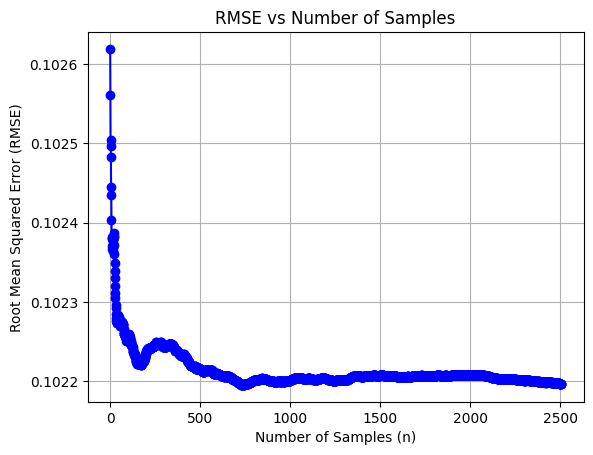

In [6]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

data_test_folder = "data_filtered"
models_folder = "models_all_samples"  # Folder where trained models are saved

# Load all test data into memory
X_test = []
y_test = []

for log_file in os.listdir(data_test_folder):
    if log_file.endswith(".log"):
        input_file_path = os.path.join(data_test_folder, log_file)
        with open(input_file_path, "r") as file:
            lines = file.readlines()
            for line in lines:
                if line.startswith("POS"):
                    try:
                        data = line.strip().split(",")
                        x = [float(data[1]), float(data[2]), float(data[3])]  # Measured position in meters
                        real_point = [float(val)/100 for val in os.path.splitext(os.path.basename(log_file))[0].split('_')]  # Real point in centimeters
                        X_test.append(x)
                        y_test.append(real_point)
                    except:
                        print(line)

# Convert lists to arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Initialize variables to store data
n_values = []
rmse_values = []

min_error = float("inf")  # Initialize with a large value
min_error_n = None

# Iterate over the range of n values
for n in range(1, nb_samples):
    model_filename = os.path.join(models_folder, f"model_{n}_samples.pkl")

    # Load the trained model
    model = joblib.load(model_filename)

    # Initialize variables to calculate RMSE
    squared_errors = []

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    if rmse < min_error:
        min_error = rmse
        min_error_n = n

    # Append data to lists
    n_values.append(n)
    rmse_values.append(rmse)

print(f"Minimum RMSE: {min_error} at n = {min_error_n}")

# Plotting the graph
plt.figure()
plt.plot(n_values, rmse_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Samples (n)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("RMSE vs Number of Samples")
plt.grid(True)
plt.show()

According to the graph n = 733 (chat GPT)

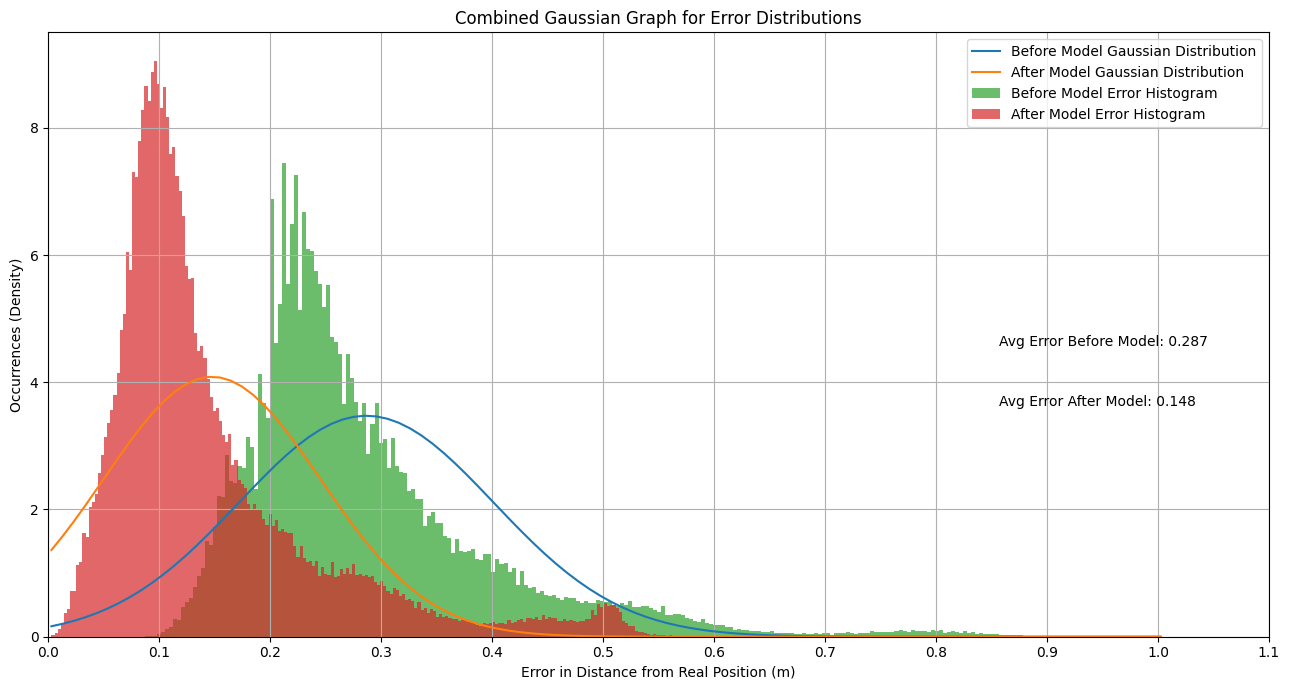

In [28]:
import joblib
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

model_path = "models_all_samples/model_733_samples.pkl"
log_folder = "data_filtered"

# Assuming you have already trained and saved the model
# Load the model from the saved file
loaded_model = joblib.load(model_path)

def read_log_file(file_path):
    # Read the data from the log file and return a numpy array of positions in meters
    # (assuming the data is a single-column containing the measured positions)
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("POS"):
                try:
                    d = line.strip().split(",")
                    x = [float(d[1]), float(d[2]), float(d[3])]
                    data.append(x)
                except:
                    print(line)
    return np.array(data)

def calculate_error(real_position, measured_positions):
    # Calculate the error in distance from the real position
    error_data = []
    for measured_position in measured_positions:
        error = np.linalg.norm(measured_position - real_position)
        error_data.append(error)
    return np.array(error_data)

def plot_combined_gaussian_graph(errors_before_model, errors_after_model):
    # Create a new figure
    fig, ax = plt.subplots(figsize=(13, 7))

    # Fit Gaussian distributions to the error data
    mu_before, std_before = norm.fit(errors_before_model)
    mu_after, std_after = norm.fit(errors_after_model)

    x_range = np.linspace(min(errors_before_model + errors_after_model), max(errors_before_model + errors_after_model), 100)
    gaussian_curve_before = norm.pdf(x_range, mu_before, std_before)  # Gaussian curve for before model
    gaussian_curve_after = norm.pdf(x_range, mu_after, std_after)  # Gaussian curve for after model

    ax.plot(x_range, gaussian_curve_before, label="Before Model Gaussian Distribution")
    ax.plot(x_range, gaussian_curve_after, label="After Model Gaussian Distribution")
    ax.hist(errors_before_model, bins='auto', alpha=0.7, density=True, label="Before Model Error Histogram")
    ax.hist(errors_after_model, bins='auto', alpha=0.7, density=True, label="After Model Error Histogram")

    ax.set_xlim(0)  # Set x-axis limit to start from 0
    ax.set_ylim(0)  # Set y-axis limit to start from 0

    ax.set_xlabel("Error in Distance from Real Position (m)")
    ax.set_ylabel("Occurrences (Density)")
    ax.set_title("Combined Gaussian Graph for Error Distributions")
    ax.legend()
    ax.grid(True)

    # Set x-axis ticks with 0.1 interval
    x_ticks = np.arange(0, max(errors_before_model + errors_after_model) + 0.1, 0.1)
    ax.set_xticks(x_ticks)

    # Calculate and display average errors
    avg_error_before = np.mean(errors_before_model)
    avg_error_after = np.mean(errors_after_model)
      # Adjust the position of the average error text to upper right corner
    ax.text(0.95, 0.5, f'Avg Error Before Model: {avg_error_before:.3f}', transform=ax.transAxes, ha='right', va='top')
    ax.text(0.94, 0.4, f'Avg Error After Model: {avg_error_after:.3f}', transform=ax.transAxes, ha='right', va='top')

    plt.tight_layout()  # Apply tight layout to the graph
    plt.show()

def main():
    log_files = [f for f in os.listdir(log_folder) if f.endswith(".log")]

    all_errors_before_model = []  # Collect errors before using the model
    all_errors_after_model = []  # Collect errors after using the model

    for log_file in log_files:
        # Extract x, y, and z from the log file name
        real_position = [float(val)/100 for val in os.path.splitext(os.path.basename(log_file))[0].split('_')]

        # Read data from the log file
        file_path = os.path.join(log_folder, log_file)
        measured_positions = read_log_file(file_path)

        # Calculate errors before using the model
        pre_trained_errors = calculate_error(real_position, measured_positions)
        all_errors_before_model.extend(pre_trained_errors)  # Add errors to the list

        # Use the model to predict
        predictions = loaded_model.predict(measured_positions)

        # Calculate errors after using the model
        trained_errors = calculate_error(real_position, predictions)
        all_errors_after_model.extend(trained_errors)  # Add errors to the list

    # Plot combined Gaussian graph for errors before and after using the model
    plot_combined_gaussian_graph(all_errors_before_model, all_errors_after_model)

if __name__ == "__main__":
    main()
